# Introduction to Matplotlib
Matplotlib is a data visualization library in Python

Other visualization libraries exist:
- Seaborn
- Plotly

In [1]:
# imports
import matplotlib.pyplot as plt # conventional alias
import pandas as pd
import numpy as np


## Basic example: Plotting a sine curve

In [2]:
# Data set up 
x = np.linspace(0, 10, 100) # Create a hundred equally spaced points between 0 and 10
y = np.sin(x)

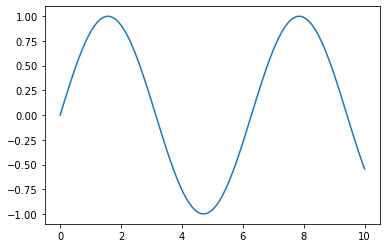

In [4]:

plt.plot(x, y) # Plots a line through the (x, y) curve
plt.show() # gets rid of the text bit above the image

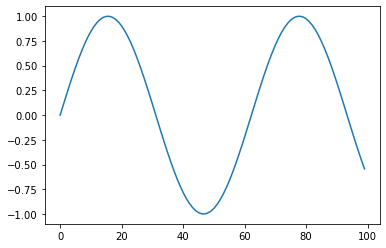

In [5]:
plt.plot(y) # Passing in the y values
plt.show()

### Matplotlib Interfaces
Matplotlib offers two interfaces:
- MATLAB style interface: 'Stateful' interface where we need to keep track of the current figure and axis
- Object Oriented interface: Non-stateful interface

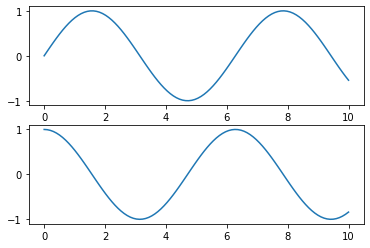

In [7]:
# Example MATLAB Interface

plt.figure()

# Set context
plt.subplot(2, 1, 1) # row, column, subplot_number
plt.plot(x, y)

# Set the context, before plotting
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x)) # We've selected another subplot_number

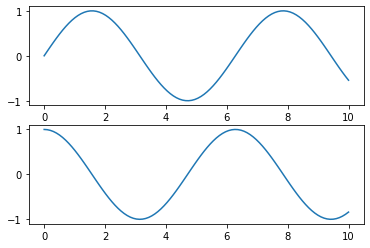

In [9]:
# Example: 00 Interface
#fig = figure, axarr = axis array
fig, axarr = plt.subplots(2, 1) # 2 rows, 1 column
axarr[0].plot(x, np.sin(x))
axarr[1].plot(x, np.cos(x))

### Line Plots

Plots a line through all the x and y values in order

- `color`
- `alpha`
- `linestyle`
- `marker`
- `linewidth`
- `label`

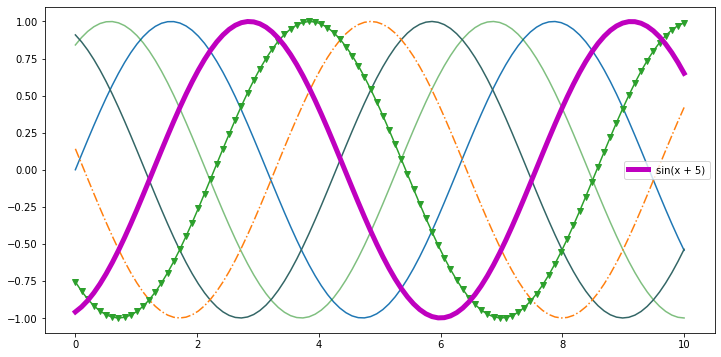

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x, np.sin(x))
 
# alpha: control the transparency: number between 0 and 1
ax.plot(x, np.sin(x + 1), color = "green", alpha = 0.5)

# color: can be specified as a string, or as an RGB tuple (other ways)
ax.plot(x, np.sin(x + 2), color = (0.2, 0.4, 0.4)) # color = (red, green, blue)

# linestyle: '-', '--', ':', '-.'
ax.plot(x, np.sin(x + 3), linestyle='-.') # color is not one already used automatically

#marker: 'o', 'v', '^'
ax.plot(x, np.sin(x + 4), marker = 'v')

# label
ax.plot(x, np.sin(x + 5), color = 'm', linewidth = 5, label = 'sin(x + 5)')
ax.legend()

### Controlling other elements of the plot

In [21]:
def create_base_plot():
    x = np.linspace(0, 10, 100)
    y = np.sin(x)
    fig, ax = plt.subplots(figsize = (12, 6))
    ax.plot(x, y)
    return fig, ax

(-0.7, 2.2)

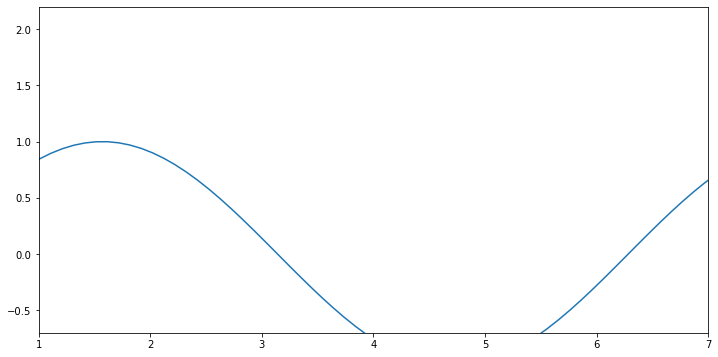

In [23]:
# setting x and y limits
fig, ax = create_base_plot()
ax.set_xlim(1, 7)
ax.set_ylim(-0.7, 2.2)

Text(0, 0.5, 'power output')

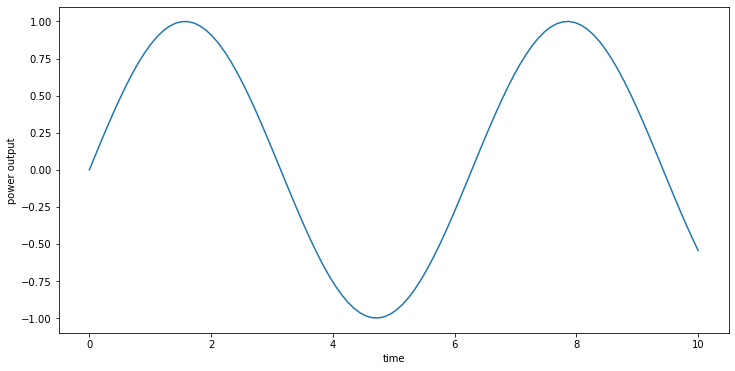

In [24]:
# set x and y labels
fig, ax = create_base_plot()
ax.set_xlabel("time")
ax.set_ylabel("power output")

Text(0.5, 1.0, 'My Title')

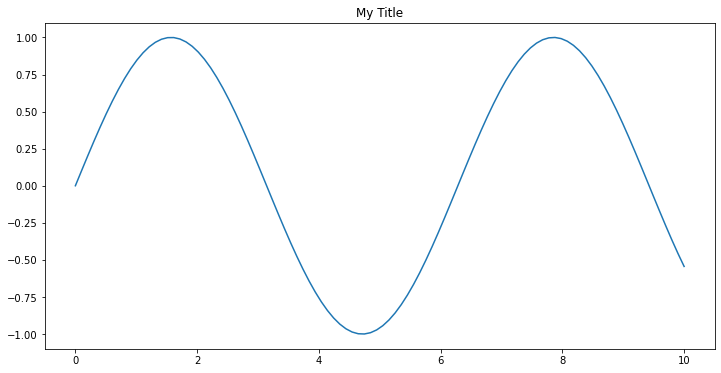

In [26]:
# Set the title
fig, ax = create_base_plot()
ax.set_title("My Title")

#### Concept Check 
Plot an exponential curve `y = np.exp(x)` with the following properties:
- 100 x values evenly spaced between 0 and 10
- y axis ranges from -5000 to 25000
- x axis ranges from -1 to 11
- red line
- purple markers (any shape)

(-5000.0, 25000.0)

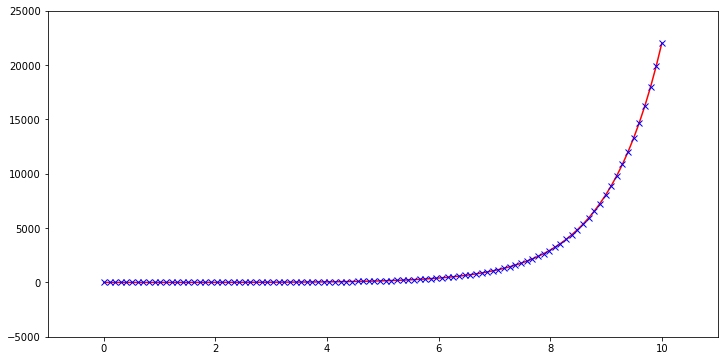

In [34]:
# TODO

x = np.linspace(0, 10, 100)
y = np.exp(x)

fig, ax = plt.subplots(figsize=(12, 6))


ax.plot(x, y, color = 'r', marker = 'x', mec = 'b')
ax.set_xlim(-1, 11)
ax.set_ylim(-5000, 25000)

## Scatter Plots
We could theoretically use the `.plot()` method to make scatter plots `(linestyle='',marker='o')`  
However, the `.scatter(...)` method gives flexibility to control the attributes for each point. 

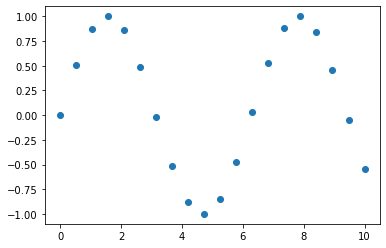

In [35]:
x = np.linspace(0, 10, 20)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), linestyle = '', marker = 'o')

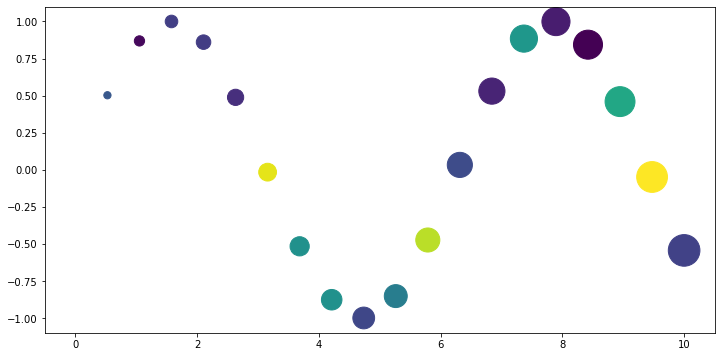

In [41]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.scatter(x, np.sin(x), s = x*100, c = np.random.uniform(30, 300, 20), alpha = 1, cmap = 'viridis')

#### Concept Check 
Plot a scatter plot of `y = log(x)` with the following properties:
- x ranges from 0 to 100
- size of the marker is proportional to the y-value
- random colouring for markers (green theme)
- moderate alpha

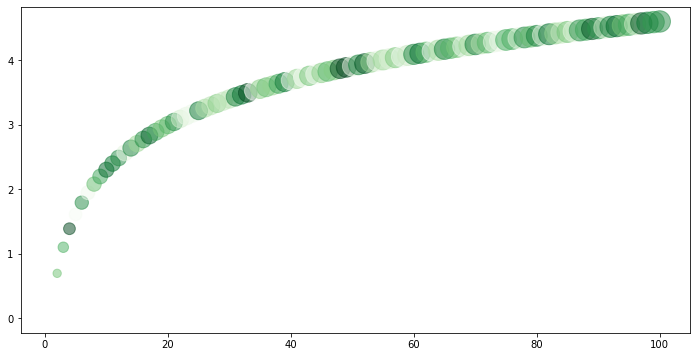

In [78]:
# TODO
fig, ax = plt.subplots(figsize = (12, 6))
x = np.linspace(1, 100, 100)
y = np.log(x)
ax.scatter(x, y, s = y*100 , c = np.random.uniform(30, 300, 100), alpha = 0.5, cmap = 'Greens')


## Histograms and Binning
We can plot histograms by using the `.hist()` method. Some important arguments are:
- `bins`: The number of bins. Can specify an integer denoting the number of bins, or a list specifying the endpoints
- `density`: If this is set to `True`, then the counts in each bin are normalised to form a density estimate

In [52]:
# Create a normal distribution
data = np.random.normal(170, 10, 20000) # 20000 samples with a mean 170 and std 10

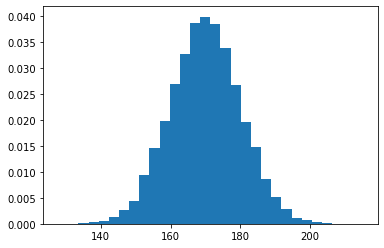

In [56]:
fig, ax = plt.subplots()
_ = ax.hist(data, bins =30, density = True)

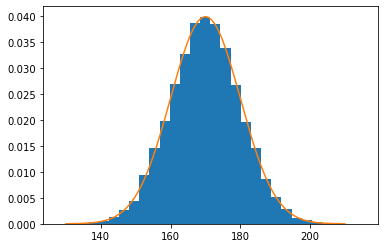

In [57]:
# Overlay the normal distribution curve onto this histogram
import scipy.stats as ss
x = np.linspace(130, 210, 1000) # 1000 equally spaced points between 130 and 210
y = ss.norm.pdf(x, loc = 170, scale = 10) # lox == mean, scale == std

fig, ax = plt.subplots()

ax.hist(data, density = True, bins = 30)
ax.plot(x, y)



### 2-d histogram

### Contour plots
Contour plots are used to represent a 3-dimensional surface on a 2-dimensional plot. The values in the third dimension (`z`) are dependent on the values of the two independent variables (`x` and `y`)

In [58]:
def f(x, y):
    z = 2*x**2 + y**2
    return z

In [62]:
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [63]:
np.shape(Z)

(50, 50)

C:\Users\WestonWhyde\AppData\Local\Temp\ipykernel_7676\768009518.py:3: UserWarning: The following kwargs were not used by contour: 'level'
  contour_set = ax.contour(X, Y, Z, level = 10) # displays the levels in a color bar


<a list of 16 text.Text objects>

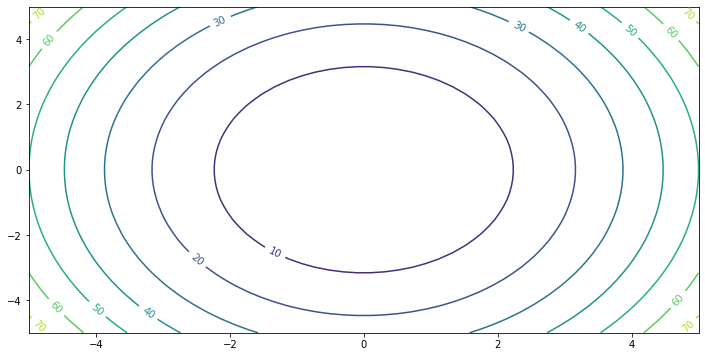

In [64]:
fig, ax = plt.subplots(figsize = (12, 6))

contour_set = ax.contour(X, Y, Z, level = 10) # displays the levels in a color bar

ax.clabel(contour_set)

A filled contour plot can be generated by using `.contourf()` method

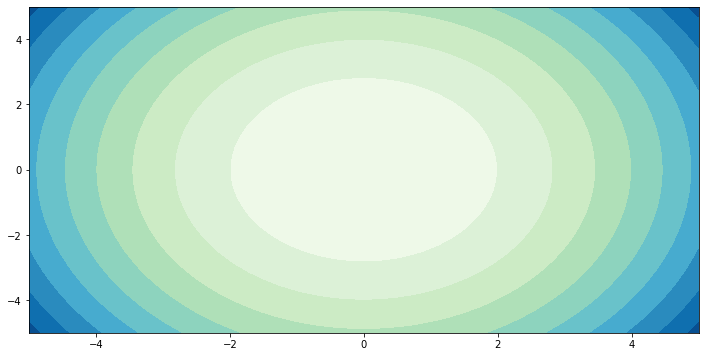

In [67]:
fig, ax = plt.subplots(figsize = (12, 6))
contour_set = ax.contourf(X, Y, Z, levels = 10, cmap = 'GnBu')

You can save Matplotlib figures to your computer by using the `fig.savefig(...)` command

# Plotting with Pandas
Pandas has a plotting module that extends the Matplotlib plotting library to provide additional visualisation options for Pandas series and dataframes. 

### Scatter matrix
A scatter matrix provides a compact representation of the relationships between different columns in a Pandas DataFrame. The main diagonal plots in the scatter matrix correspond to the histogram of the data in the corresponding column

#### Example: Creating a Scatter matrix from the California Housing Dataset

In [68]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [70]:
data.keys() # Inspect the keys

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [71]:
df = pd.DataFrame(data["data"], columns = data["feature_names"])
df["price"] = data["target"]

In [72]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [73]:
df.shape # Returns ( # of columns, # of rows)

(20640, 9)

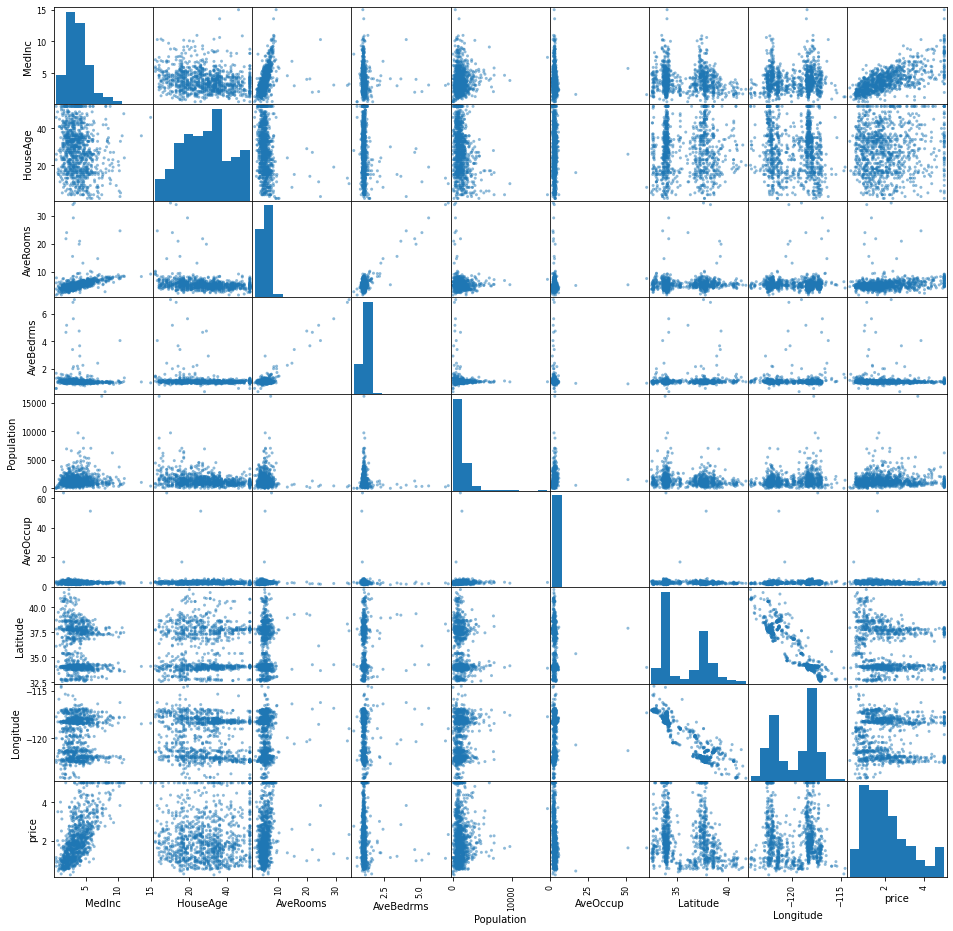

In [74]:
# Plot our scatter matrix
_ = pd.plotting.scatter_matrix(df.sample(n = 1000), figsize=(16, 16)) # Taking a sample of 1000 rows bc this takes a lot of computer power


#### Concept Check 
Plot the California housing data using a scatterplot. Add the following properties.
- points determined by latitude and longitude
- colour determined by the price
- size determined by population
- alpha should be small
- pick a nice colourmap
- add a colorbar

Hint: You can pass in pandas series object into the ax.scatter method.


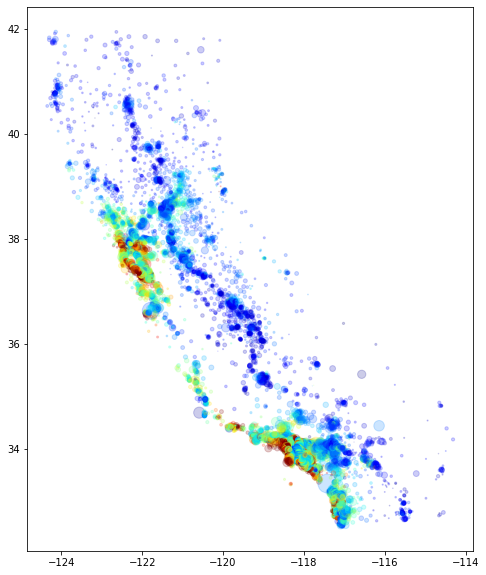

In [79]:
# TODO
fig, ax = plt.subplots(figsize = (8, 10))
_ = ax.scatter(df["Longitude"], df["Latitude"], c=df["price"], s = df["Population"]/100, alpha = 0.2, cmap="jet")

## Plotting data in DataFrames
Pandas provides the ability to generate different plots from dataframes:
- Line plots
- Bar charts
- Area charts
- Histograms
- Box plots

In [81]:
from yahoofinancials import YahooFinancials 

In [83]:
companies = ["AAPL", "MSFT", "PYPL", "SBUX"] # Getting historic stocks for Apple, Microsoft, Paypal, and Starbucks
yf = YahooFinancials(companies)
stock_prices = yf.get_historical_price_data("2018-01-01", "2021-01-01", "daily")

In [89]:

dates = [row["formatted_date"] for row in stock_prices["AAPL"]["prices"]]
data = {company: [row["close"] for row in stock_prices[company]["prices"]] for company in companies}
df = pd.DataFrame(data, index = pd.DatetimeIndex(dates))

### Line plots
A line plot plots the columns against the index

<AxesSubplot:>

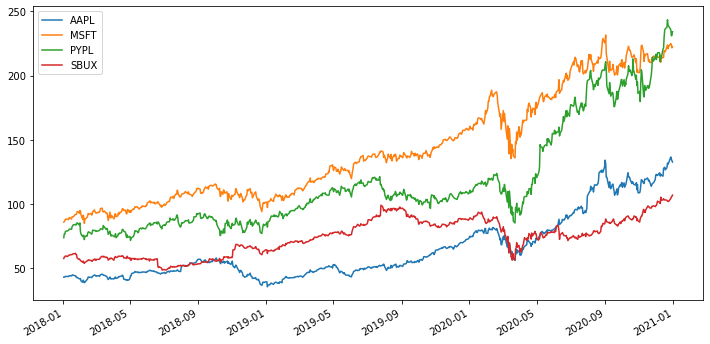

In [90]:
df.plot(figsize = (12, 6))

### Bar charts
A bar chart plots the values against the index

In [91]:
df.loc["2019-01-02"] # Get values for specific date

AAPL     39.480000
MSFT    101.120003
PYPL     85.750000
SBUX     64.320000
Name: 2019-01-02 00:00:00, dtype: float64

<AxesSubplot:>

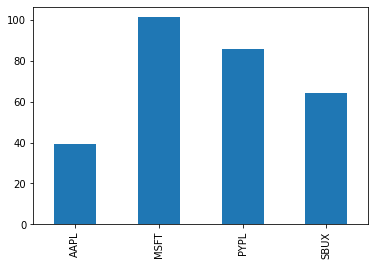

In [93]:
df.loc["2019-01-02"].plot.bar() # bar chart

(0.0, 200.0)

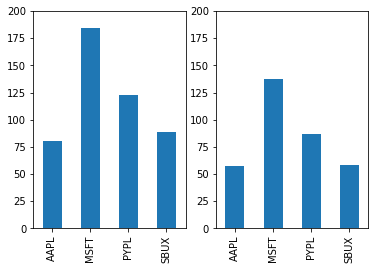

In [96]:
# Create a figure with matplotlib
fig, axarr = plt.subplots(1, 2)
df.loc["2020-02-20"].plot.bar(ax = axarr[0]) # pass that axis to the df so it knows where to plot the graph
df.loc["2020-03-20"].plot.bar(ax = axarr[1])

axarr[0].set_ylim(0, 200)
axarr[1].set_ylim(0, 200)

<AxesSubplot:>

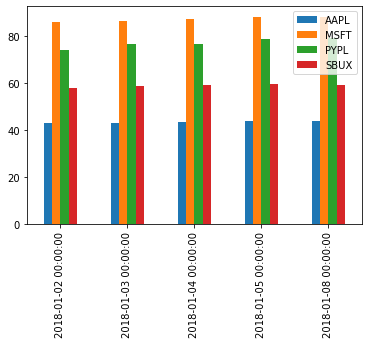

In [99]:
# Multiple bar charts

df.head().plot.bar(fig = (20, 20))

<AxesSubplot:>

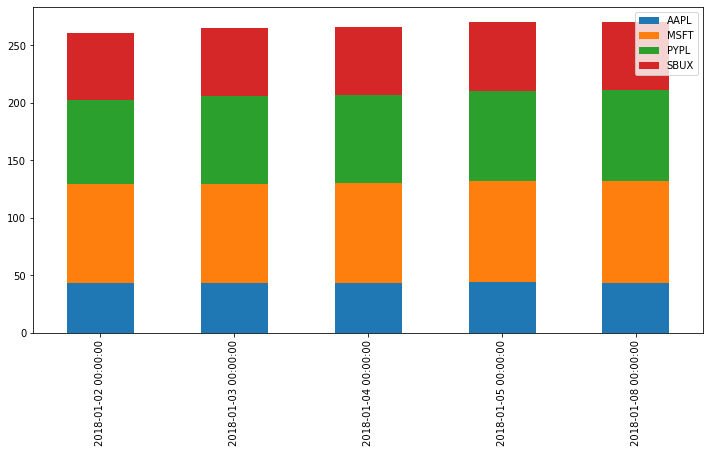

In [100]:
df.head().plot.bar(stacked = True, figsize = (12, 6))

### Area chart
An area chart is an extension of the line plot where the area under the lines are shaded

<AxesSubplot:>

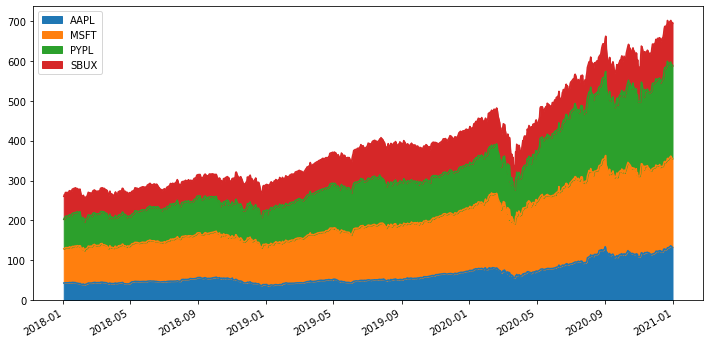

In [101]:
df.plot.area(figsize = (12, 6))

<AxesSubplot:>

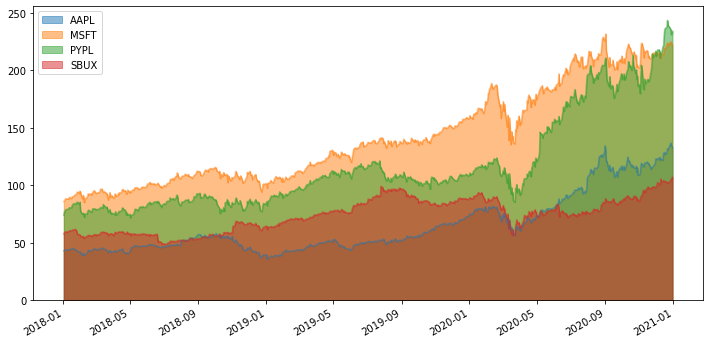

In [103]:
# Unstacked area chart
df.plot.area(stacked = False, figsize= (12,6))

### Histograms
A histogram provides a representation of the data distribution

In [104]:
# Generate data for histogram plots
df = pd.DataFrame({'Avg Height of Premier League footballers': 182 + 5*np.random.randn(10000),
                  'Avg Height of NBA Basketball players': 198 + 5*np.random.randn(10000)})

In [105]:
df.head()

,Avg Height of Premier League footballers,Avg Height of NBA Basketball players
0,183.560803,200.814392
1,182.479616,196.217557
2,177.433661,195.243418
3,182.523838,199.062058
4,180.901292,194.471043


# Plot the histogram
df.plot.hist(bins=30,alpha=0.3,figsize=(10,5))

<AxesSubplot:ylabel='Frequency'>

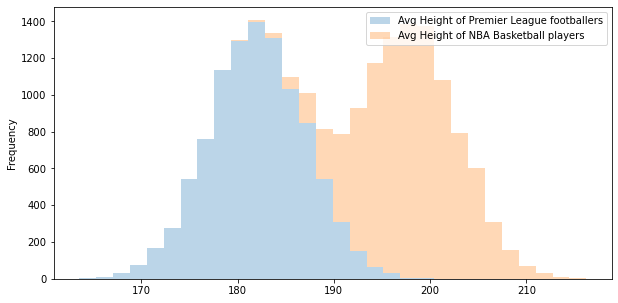

In [106]:
df.plot.hist(bins = 30, alpha = 0.3, figsize = (10, 5), stacked = True)

<AxesSubplot:>

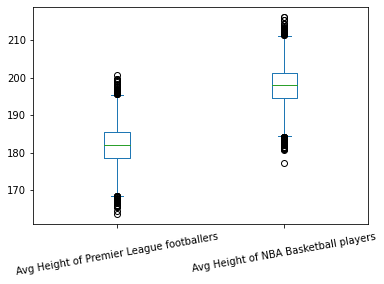

In [109]:
df.plot.box(rot = 10) # rot = rotation of title